The `.hea` file indicates the header of the data to be read from study 40689238

# ECG Interpretation Guide

## P-Wave: Atrial Depolarization
- Represents atrial depolarization, the first electrical activity seen on an ECG.
- **Normal duration**: ~80ms (0.08s), typically **less than 120ms**.
- **Normal amplitude**: < 2.5mm in lead II.
- **Morphology**: Smooth and rounded for Monophasic (lead II), biphasic (lead V1)
- **Best seen in leads**: I, II, aVF.
- **Abnormalities**:
  - **Tall/Peaked P-waves (P pulmonale)**: Suggests **right atrial enlargement** (>2.5mm in II, >1.5mm in V1)
  - **Wide/Notched P-waves (P mitrale)**: Suggests **left atrial enlargement** (>120ms) 
  - **Absent P-wave**: Could indicate **atrial fibrillation (AF)** or a junctional rhythm

## Heart Rates: Bradycardia and Tachycardia
Heart rate is derived from RR intervals (distance between R-peaks):
  Heart_Rate = 60 / RR_Interval

- **Normal Sinus Rhythm (NSR):** 60-100 BPM
- **Bradycardia:** Heart rate < 60 BPM.
  - Can be normal in well-trained athletes.
  - May indicate **sinus node dysfunction**, heart block, or medication effects.
- **Tachycardia:** Heart rate > 100 BPM.
  - Can be due to physiological stress (exercise, fever) or pathological causes like **supraventricular tachycardia (SVT), atrial fibrillation, or ventricular tachycardia**.
- **Heart Rate Variability (HRV):**
  - High HRV: Indicates good autonomic function
  - Low HRV: Associated with stress, arrhythmias, myocardial infarction

## (A) QRS Complex: Ventricular Depolarization
- **Narrow/Normal QRS (<100ms):** Supraventricular origin, meaning the impulse originates **above the ventricles** (e.g., from the atria or AV node).
- **Widened QRS (>100ms, >120ms for block):** Indicates a **ventricular origin** or **conduction delay** (e.g., bundle branch block, ventricular pre-excitation, or ventricular tachycardia).

### (A.1) Amplitude of QRS
- **High amplitude**:
  - May suggest **ventricular hypertrophy** (left or right, based on affected leads).
  - **Left Ventricular Hypertrophy (LVH)** criteria: S-wave depth in V1 + R-wave height in V5/V6 > 35mm.
  - **Right Ventricular Hypertrophy (RVH)** criteria: R-wave height in V1 > S-wave depth.
- **Variable amplitude (Electrical alternans)**:
  - Suggests **pericardial effusion** or severe cardiomyopathy.

### (A.2) QRS Wave Components
- **Q-Wave:** First negative deflection **before** an R-wave.
- **R-Wave:** The first **positive** deflection.
- **S-Wave:** Any **negative** deflection following an R-wave.

### (A.3) Pathological Q-Waves Criteria
Pathological Q-waves are **strong indicators of myocardial infarction (MI)** and meet the following criteria:
- Depth **≥ 25%** of the QRS complex or **> 2mm**.
- Duration **> 40ms**.
- Presence in **V1 - V3** suggests anterior infarction.

### (A.4) R-Wave Progression
- **Normal:** R-wave should become **greater than S-wave** around **V3/V4**.
- **Poor R-wave progression:** May indicate **previous anterior myocardial infarction or left ventricular dysfunction**.

## ST-Segment: Interval Between Ventricular Depolarization and Repolarization
- **Normal duration**: Usually **80-120ms**.
- **Elevations (>1mm or 2mm in V1/V2) may indicate:**
  - **ST-Elevation Myocardial Infarction (STEMI)**.
  - **Pericarditis** (diffuse concave ST-elevation, PR depression).
- **Reciprocal ST-Depression:**
  - Seen in **III and aVF** in cases of infarction.
  - **ST-depression is always abnormal** and suggests **ischemia**.
- **ST-segment in Bundle Branch Block (BBB)**:
  - Requires additional criteria (e.g., Sgarbossa criteria in LBBB for MI detection).

### Benign Early Repolarization
- Common in **young, healthy individuals**.
- **Characteristics:**
  - Concave ST-elevation.
  - No reciprocal changes.
  - Not dynamic (remains stable over time).
  - Prominent J-point elevation.

## T-Waves: Ventricular Repolarization
### Normal & Abnormal T-Waves
- **Inverted T-Waves**:
  - **Normal in:** V1, aVR, III.
  - Can persist from **childhood** in some individuals.
  - **V2 and V3 inverted T waves** in the absence of ST changes can be **normal**.
  - **Widespread inverted T-waves** suggest ischemia, left ventricular hypertrophy, or raised intracranial pressure.
- **Tall T-Waves:** May indicate **hyperkalemia**.
- **Biphasic T-Waves:**
  - **Type 1 biphasic:** More negative; seen in **ischemia**.
  - **Type 2 biphasic:** More positive; seen in **hypokalemia**.

## QT-Interval: Ventricular Depolarization to Repolarization
- The QT interval varies with heart rate and requires correction using **Bazett's formula**:
  
  QTc = QT/sqrt(RR)

- **Normal QTc Values:**
  - **Males:** 360ms - 440ms.
  - **Females:** 360ms - 460ms.
- **QTc Prolongation**:
  - Prolonged QT can lead to **Torsades de Pointes**, a potentially fatal ventricular arrhythmia.
  - Causes: Congenital **Long QT Syndrome (LQTS)**, drugs (antiarrhythmics, antidepressants), electrolyte imbalances (hypokalemia, hypocalcemia, hypomagnesemia).

## U-Waves: Post-T-Wave Activity
- Occasionally follows the T-wave, most visible in **V2-V3**.
- **Increased U-wave amplitude**:
  - Electrolyte imbalances (**hypokalemia, hypocalcemia, hypomagnesemia**).
  - **Hypothermia**.
  - **Bradycardia**.

## References
- [Electrocardiography - Wikipedia](https://en.wikipedia.org/wiki/Electrocardiography)
- [ECG Basics YT video](https://youtu.be/u1m3HKW1VqU?si=2qTChCiMFDmWQfUb)

**Time-domain features:**
  - P-wave duration, QRS duration, QT interval, PR interval, ST-segment changes

**Amplitude features:**
  - P-wave amplitude, QRS amplitude, T-wave amplitude, U-wave presence

**Morphological features:**
  - R-wave progression, pathological Q-waves, T-wave inversion

**Classification of rhythm:**
  - Normal Sinus Rhythm (NSR), Atrial Fibrillation (AF), Ventricular Tachycardia (VT), Heart Blocks
  
**Frequency-domain analysis:**
  - Try to apply Fourier Transform to detect subtle abnormalities (Try to use it)

Amplitude of each lead: Sample-rate: 500 Hz, Sample-count: 5000 samples in 10 seconds
-----------------------------------------------------------------------------
Lead I: Max Amp = 1.180 mV, Min Amp = -0.738 mV, Peak-to-Peak Amp = 1.918 mV
Lead II: Max Amp = 1.412 mV, Min Amp = -0.787 mV, Peak-to-Peak Amp = 2.198 mV
Lead III: Max Amp = 1.050 mV, Min Amp = -1.131 mV, Peak-to-Peak Amp = 2.181 mV
Lead aVR: Max Amp = 1.326 mV, Min Amp = -0.801 mV, Peak-to-Peak Amp = 2.127 mV
Lead aVF: Max Amp = 1.113 mV, Min Amp = -0.751 mV, Peak-to-Peak Amp = 1.863 mV
Lead aVL: Max Amp = 1.481 mV, Min Amp = -0.823 mV, Peak-to-Peak Amp = 2.304 mV
Lead V1: Max Amp = 1.258 mV, Min Amp = -0.767 mV, Peak-to-Peak Amp = 2.025 mV
Lead V2: Max Amp = 1.165 mV, Min Amp = -0.954 mV, Peak-to-Peak Amp = 2.119 mV
Lead V3: Max Amp = 1.122 mV, Min Amp = -0.791 mV, Peak-to-Peak Amp = 1.913 mV
Lead V4: Max Amp = 1.048 mV, Min Amp = -0.750 mV, Peak-to-Peak Amp = 1.798 mV
Lead V5: Max Amp = 1.426 mV, Min Amp = -0.824 mV, Pea

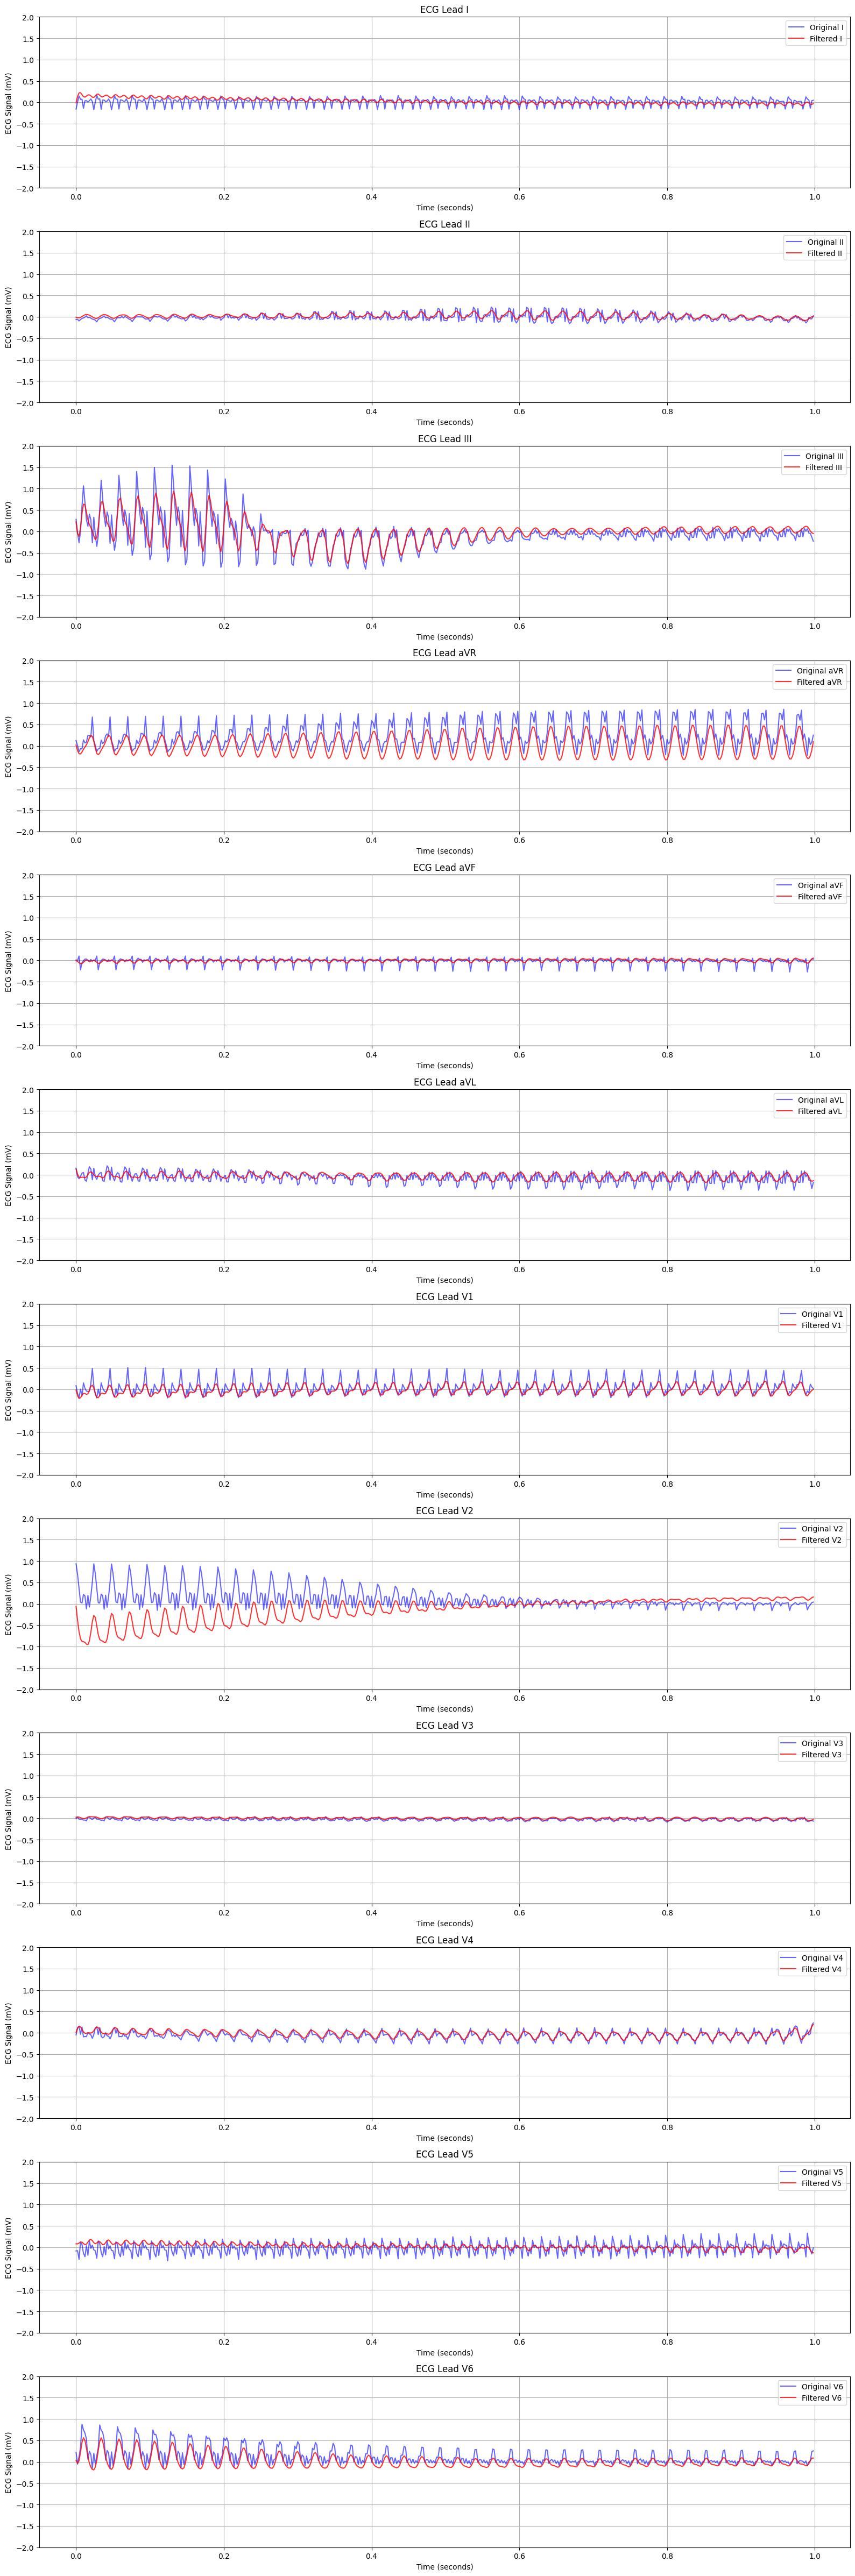

In [65]:
from scipy.signal import find_peaks, butter, filtfilt, detrend
import numpy as np
import matplotlib.pyplot as plt

# Load header & data file
hea_file = "../data/data_bin/40689238.hea"
dat_file = "../data/data_bin/40689238.dat"

# Read the header to extract sampling frequency and scaling factors
with open(hea_file, "r") as f:
    lines = f.readlines()

header_info = lines[0].strip().split()
channel_count = int(header_info[1]) # Number of channels
frequency     = int(header_info[2]) # Sampling frequency (Hz)
sample_count  = int(header_info[3]) # Total samples per channel

# For each channel it uses a frequency of 500 Hz
# With a sample count of 5000 samples
# The total time is 10 seconds (duration of the signal)


# Extract per-channel parameters (scale factors and channel names)
# Each subsequent line corresponds to one channel.
scale_factors = []  # list of scale factors for each lead
channel_names = []  # list of lead names

for i in range(1, channel_count + 1):
    parts = lines[i].strip().split()
    # parts[2] is a string like "200.0(0)/mV". Extract the numeric scale factor.
    scale_factor = float(parts[2].split("(")[0])
    scale_factors.append(scale_factor)

    # The last field is the lead name (e.g., I, II, III, aVR, etc.)
    channel_names.append(parts[-1])


# Read the binary .dat file as 16-bit signed integers.
data = np.fromfile(dat_file, dtype=np.int16)

# The data is stored in an interleaved format: sample0 of all channels, sample1 of all channels, etc.
# Reshape the data so that each row corresponds to one channel (lead).
data = data.reshape(channel_count, sample_count)

# Confirm that we have the expected number of samples per channel:
if data.shape[1] != sample_count:
    print("Warning: The number of samples per channel does not match the header information.")



# Convert raw data counts to millivolts (mV) using each lead's scale factor.
# For each lead, the conversion is: signal (mV) = raw_value / scale_factor.
mv_signal = [data[i] / scale_factors[i] for i in range(channel_count)]


def bandpass_filter(signal, lowcut=0.5, highcut=80.0, fs=frequency, order=3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal


# Apply filtering and baseline removal
filtered_signals = []
for signal in mv_signal:
    filtered = bandpass_filter(signal)
    filtered_signals.append(detrend(filtered))

def calculate_amplitude(ecg_signal):
    max_amplitude = np.max(ecg_signal)
    min_amplitude = np.min(ecg_signal)
    peak_to_peak = max_amplitude - min_amplitude
    return max_amplitude, min_amplitude, peak_to_peak

# Calculate and print amplitudes for each lead
print(f"Amplitude of each lead: Sample-rate: 500 Hz, Sample-count: 5000 samples in 10 seconds")
print("-----------------------------------------------------------------------------")
for i in range(channel_count):
    max_amp, min_amp, p2p_amp = calculate_amplitude(filtered_signals[i])
    print(f"Lead {channel_names[i]}: Max Amp = {max_amp:.3f} mV, Min Amp = {min_amp:.3f} mV, Peak-to-Peak Amp = {p2p_amp:.3f} mV")


# Tipically sample count is 5000 and the frequency is 500 Hz
# Create a time axis (in seconds) for the samples.
time = np.arange(sample_count) / frequency

# Define the specific time range in seconds (200ms to 400ms)
start_time_sec = 0  
end_time_sec   = 1
start_idx = int(start_time_sec * frequency)
end_idx   = int(end_time_sec * frequency)

# Plot each lead in a separate subplot.
plt.figure(figsize=(16, 48))
for i in range(channel_count):
    plt.subplot(channel_count, 1, i + 1)
    # Use this to zoom in on a specific time range
    # plt.plot(time[start_idx:end_idx], mv_signal[i][start_idx:end_idx], color="b", label=f"Lead {channel_names[i]}")
    # plt.plot(time, filtered_signals[i], color="b", label=f"Lead {channel_names[i]}")
    
    # Plot the original signal
    # plt.plot(time, mv_signal[i], label=f"Original {channel_names[i]}", color='blue', alpha=0.6)
    plt.plot(time[start_idx:end_idx], mv_signal[i][start_idx:end_idx], label=f"Original {channel_names[i]}", color='blue', alpha=0.6)
    
    # Plot the filtered signal
    # plt.plot(time, filtered_signals[i], label=f"Filtered {channel_names[i]}", color='red', alpha=0.8)
    plt.plot(time[start_idx:end_idx], filtered_signals[i][start_idx:end_idx], label=f"Filtered {channel_names[i]}", color='red', alpha=0.8)
    
    plt.ylim([-2, 2])

    plt.xlabel("Time (seconds)")
    plt.ylabel("ECG Signal (mV)")
    plt.title(f"ECG Lead {channel_names[i]}")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


**THE IMAGE ABOVE**
- The sample signal goes from 0 to 10 seconds. The snapshot displayed above is in
  a window of 0 to 500ms to display propperly the individual signals of each Lead.


Analyzing Lead I
Heart Rate: nan BPM
QRS Duration: 3952.00 ms
ST Elevation: 0 instances, ST Depression: 1 instances
T-Wave Inversion: 198 instances, Average T-Wave Height: 0.12 mV
QT Interval: 22.00 ms, QTc Interval: nan ms


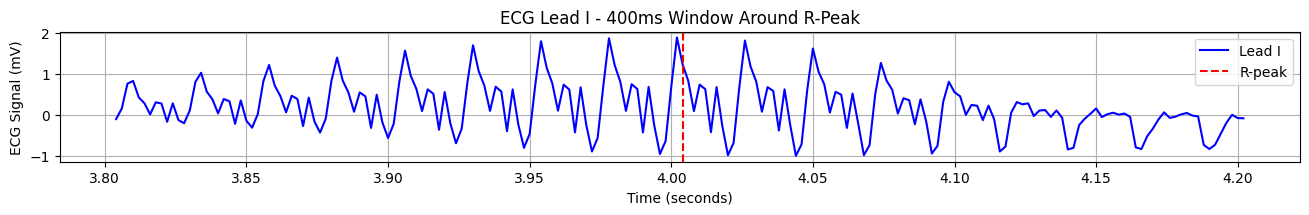


Analyzing Lead II
Heart Rate: 7.6 BPM
Bradycardia detected.
QRS Duration: 5972.00 ms
ST Elevation: 0 instances, ST Depression: 0 instances
T-Wave Inversion: 248 instances, Average T-Wave Height: 0.12 mV
QT Interval: 11.00 ms, QTc Interval: 7.82 ms


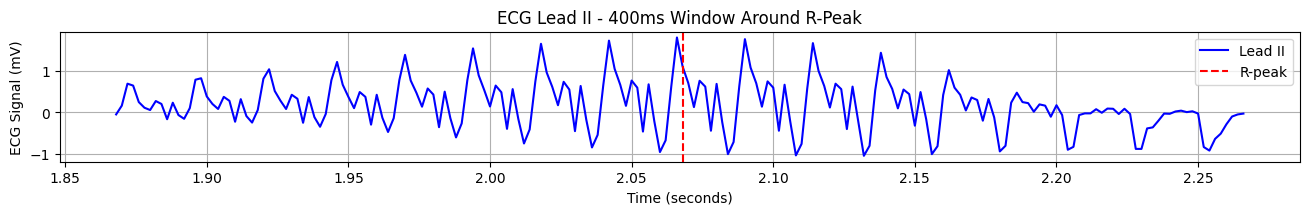

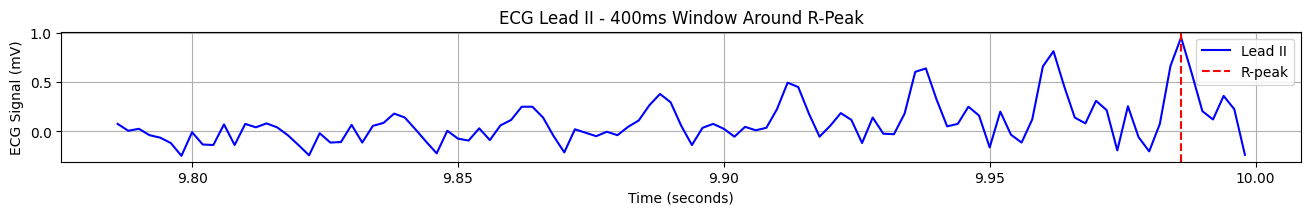


Analyzing Lead III
Heart Rate: 7.7 BPM
Bradycardia detected.
QRS Duration: 4028.00 ms
ST Elevation: 0 instances, ST Depression: 0 instances
T-Wave Inversion: 300 instances, Average T-Wave Height: 0.15 mV
QT Interval: 22.00 ms, QTc Interval: 7.87 ms


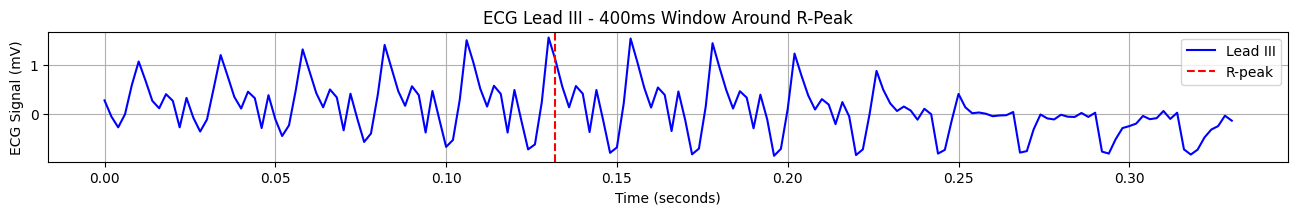

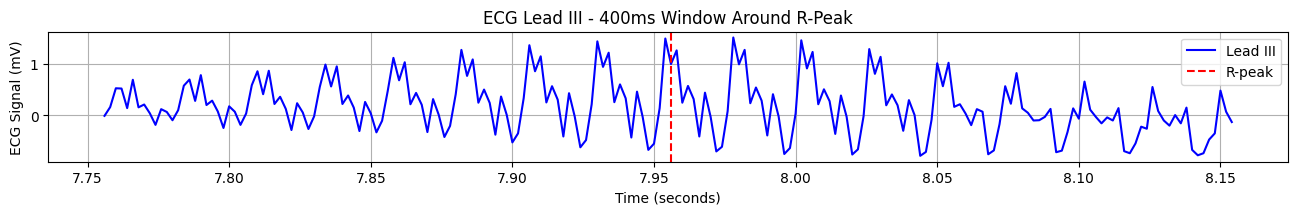


Analyzing Lead aVR
Heart Rate: nan BPM
QRS Duration: 5656.00 ms
ST Elevation: 0 instances, ST Depression: 0 instances
T-Wave Inversion: 60 instances, Average T-Wave Height: 0.24 mV
QT Interval: 22.00 ms, QTc Interval: nan ms


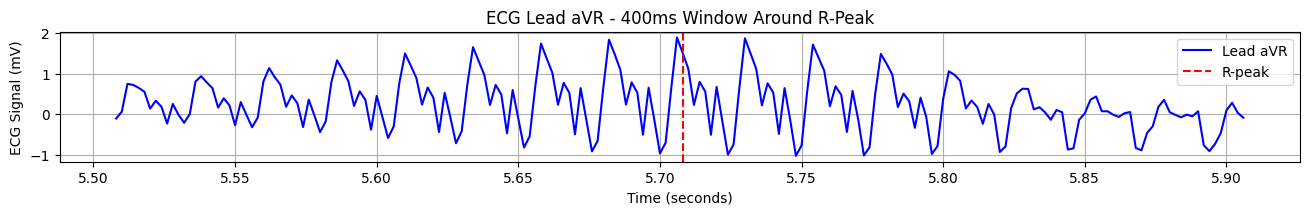


Analyzing Lead aVF
Heart Rate: nan BPM
QRS Duration: 3600.00 ms
ST Elevation: 0 instances, ST Depression: 1 instances
T-Wave Inversion: 276 instances, Average T-Wave Height: 0.09 mV
QT Interval: 22.00 ms, QTc Interval: nan ms


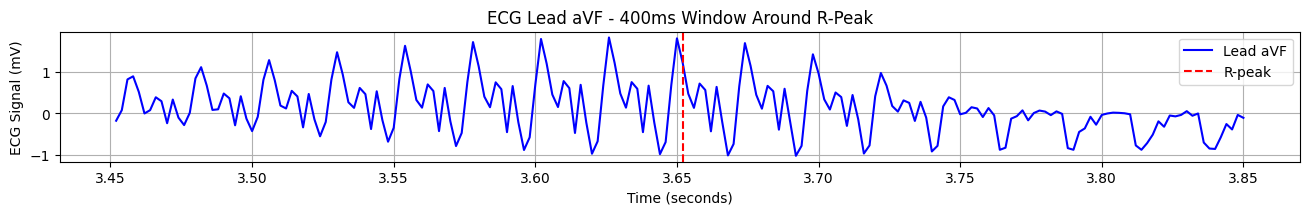


Analyzing Lead aVL
Heart Rate: 7.7 BPM
Bradycardia detected.
QRS Duration: 5396.00 ms
ST Elevation: 0 instances, ST Depression: 0 instances
T-Wave Inversion: 276 instances, Average T-Wave Height: 0.19 mV
QT Interval: 22.00 ms, QTc Interval: 7.89 ms


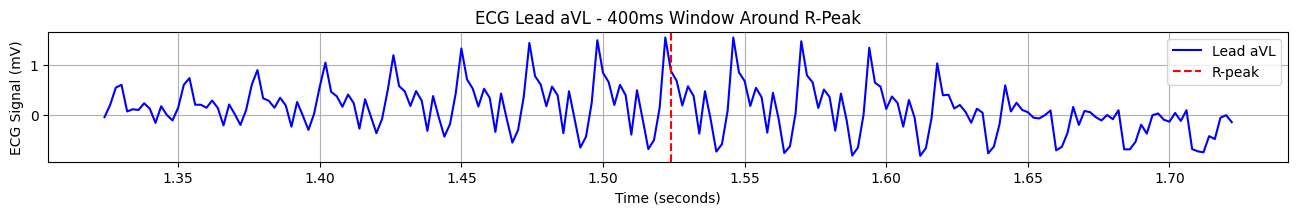

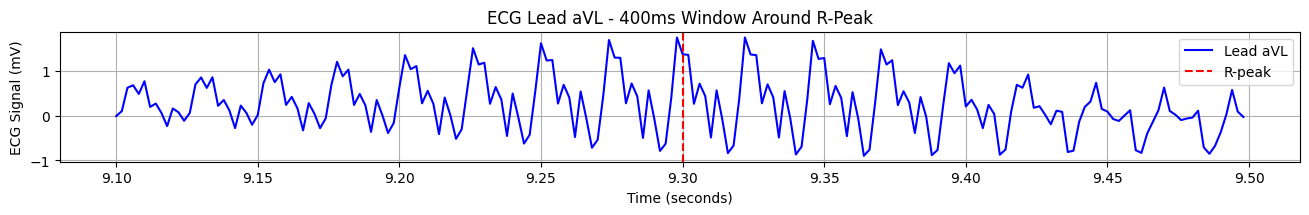


Analyzing Lead V1
Heart Rate: nan BPM
QRS Duration: 7144.00 ms
ST Elevation: 0 instances, ST Depression: 0 instances
T-Wave Inversion: 113 instances, Average T-Wave Height: 0.20 mV
QT Interval: 22.00 ms, QTc Interval: nan ms


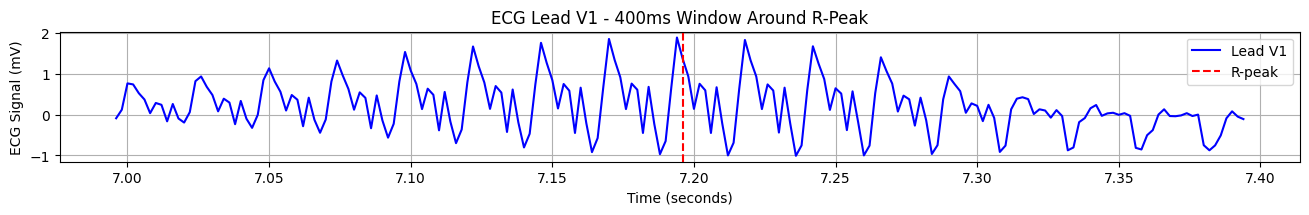


Analyzing Lead V2
Heart Rate: nan BPM
QRS Duration: 5112.00 ms
ST Elevation: 0 instances, ST Depression: 0 instances
T-Wave Inversion: 232 instances, Average T-Wave Height: 0.10 mV
QT Interval: 22.00 ms, QTc Interval: nan ms


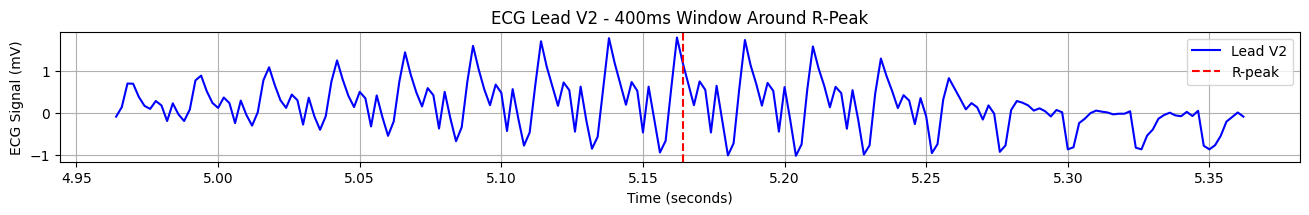


Analyzing Lead V3
Heart Rate: nan BPM
QRS Duration: 3176.00 ms
ST Elevation: 0 instances, ST Depression: 0 instances
T-Wave Inversion: 203 instances, Average T-Wave Height: 0.11 mV
QT Interval: 22.00 ms, QTc Interval: nan ms


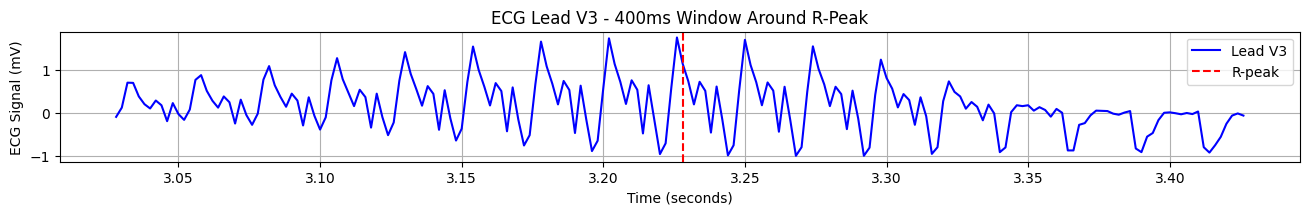


Analyzing Lead V4
Heart Rate: 7.5 BPM
Bradycardia detected.
QRS Duration: 5248.00 ms
ST Elevation: 0 instances, ST Depression: 1 instances
T-Wave Inversion: 256 instances, Average T-Wave Height: 0.10 mV
QT Interval: 22.00 ms, QTc Interval: 7.79 ms


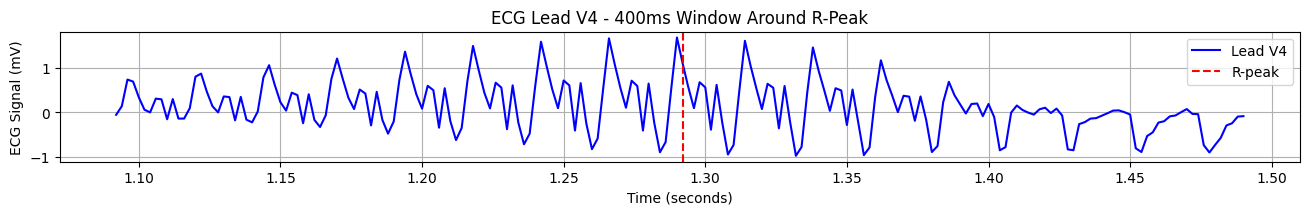

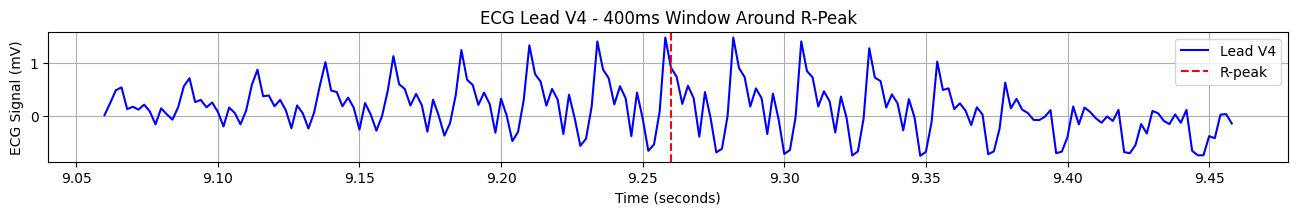


Analyzing Lead V5
Heart Rate: 20.3 BPM
Bradycardia detected.
QRS Duration: 8483.00 ms
ST Elevation: 0 instances, ST Depression: 0 instances
T-Wave Inversion: 174 instances, Average T-Wave Height: 0.25 mV
QT Interval: 11.00 ms, QTc Interval: 12.81 ms


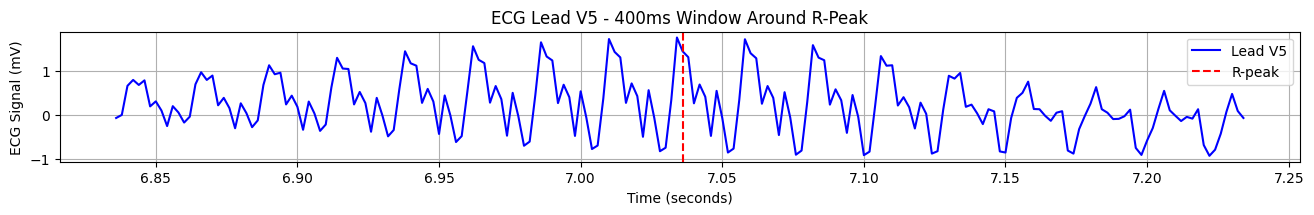

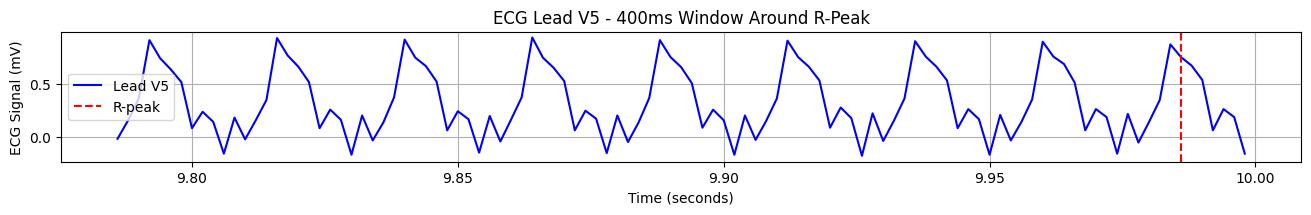


Analyzing Lead V6
Heart Rate: nan BPM
QRS Duration: 4760.00 ms
ST Elevation: 0 instances, ST Depression: 1 instances
T-Wave Inversion: 58 instances, Average T-Wave Height: 0.15 mV
QT Interval: 22.00 ms, QTc Interval: nan ms


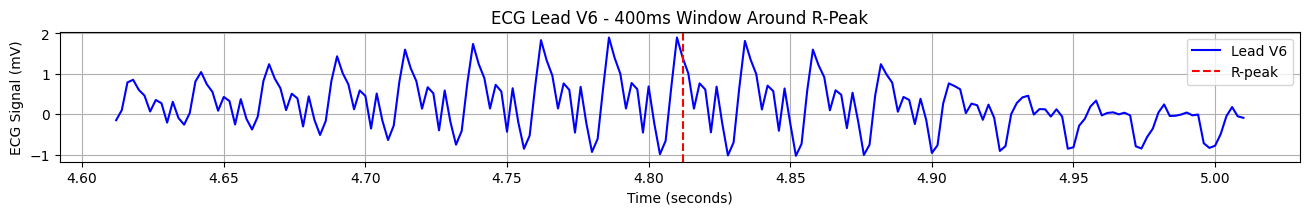

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# Load header & data file
hea_file = "../data/data_bin/40689238.hea"
dat_file = "../data/data_bin/40689238.dat"

# Read the header to extract sampling frequency and scaling factors
with open(hea_file, "r") as f:
    lines = f.readlines()

header_info = lines[0].strip().split()
channel_count = int(header_info[1]) # Number of channels
frequency     = int(header_info[2]) # Sampling frequency (Hz)
sample_count  = int(header_info[3]) # Total samples per channel


# Extract per-channel parameters (scale factors and channel names)
# Each subsequent line corresponds to one channel.
scale_factors = []  # list of scale factors for each lead
channel_names = []  # list of lead names

for i in range(1, channel_count + 1):
    parts = lines[i].strip().split()
    # parts[2] is a string like "200.0(0)/mV". Extract the numeric scale factor.
    scale_factor = float(parts[2].split("(")[0])
    scale_factors.append(scale_factor)

    # The last field is the lead name (e.g., I, II, III, aVR, etc.)
    channel_names.append(parts[-1])

# Read the binary .dat file as 16-bit signed integers.
data = np.fromfile(dat_file, dtype=np.int16)

# The data is stored in an interleaved format: sample0 of all channels, sample1 of all channels, etc.
# Reshape the data so that each row corresponds to one channel (lead).
# data = data.reshape(-1, channel_count).T
data = data.reshape(channel_count, sample_count)

# Confirm that we have the expected number of samples per channel:
if data.shape[1] != sample_count:
    print("Warning: The number of samples per channel does not match the header information.")



# Convert raw data counts to millivolts (mV) using each lead's scale factor.
# For each lead, the conversion is: signal (mV) = raw_value / scale_factor.
mv_signal = []
for i in range(channel_count):
    mv_signal.append(data[i] / float(scale_factors[i]))

# Tipically sample count is 5000 and the frequency is 500 Hz
# Create a time axis (in seconds) for the samples.
time = np.arange(sample_count) / frequency

# 
# 
# ATTEMPT TO ANALYZE ECG SIGNALS (PROBABLY NOT WORKING)
# 
# 


# Bandpass filter to remove noise (0.5-50 Hz, typical for ECG)
def bandpass_filter(signal, lowcut=0.5, highcut=50.0, fs=500.0, order=1):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# R-peak detection using Pan-Tompkins method or find_peaks
def calculate_heart_rate(ecg_signal):
    # Apply bandpass filter to clean the signal
    filtered_signal = bandpass_filter(ecg_signal)
    
    # Find R-peaks (QRS complexes) in the filtered signal
    r_peaks, _ = find_peaks(filtered_signal, height=0.5, distance=300)
    rr_intervals = np.diff(r_peaks) / frequency  # Convert to seconds
    heart_rate = 60 / np.mean(rr_intervals)  # Convert to BPM
    return heart_rate, r_peaks, filtered_signal

# QRS complex analysis (QRS duration, width, etc.)
def analyze_qrs(ecg_signal, r_peaks):
    qrs_durations = []
    for r in r_peaks:
        # Look for the Q and S points around the R peak
        left = max(r - 50, 0)
        right = min(r + 50, len(ecg_signal))
        
        # Find the Q and S peaks (Q is the lowest point before R, S after R)
        q_point = np.argmin(ecg_signal[left:r])
        s_point = np.argmin(ecg_signal[r:right]) + r
        
        # QRS duration in milliseconds
        qrs_duration = (s_point - q_point) / frequency * 1000  # milliseconds
        qrs_durations.append(qrs_duration)
    
    return np.mean(qrs_durations)

# ST-segment analysis: Detect ST elevation or depression
def analyze_st_segment(ecg_signal, r_peaks):
    st_elevation = []
    st_depression = []
    for r in r_peaks:
        # Look for the ST segment 60-80ms after R peak
        st_segment = ecg_signal[r + int(0.06 * frequency):r + int(0.08 * frequency)]
        baseline = np.mean(ecg_signal[r - int(0.2 * frequency):r])  # ST baseline
        
        st_amplitude = np.mean(st_segment) - baseline
        if st_amplitude > 0.1:  # ST elevation
            st_elevation.append(st_amplitude)
        elif st_amplitude < -0.1:  # ST depression
            st_depression.append(st_amplitude)
    
    return st_elevation, st_depression

# T-wave analysis (inversion, height)
def analyze_t_wave(ecg_signal):
    t_wave_inversion = []
    t_wave_height = []
    
    for i in range(1, len(ecg_signal) - 1):
        # Simple T-wave detection: Look for peaks following QRS
        if ecg_signal[i-1] < ecg_signal[i] > ecg_signal[i+1]:
            if ecg_signal[i] < 0:  # Inverted T-wave
                t_wave_inversion.append(i)
            t_wave_height.append(ecg_signal[i])
    
    return t_wave_inversion, np.mean(t_wave_height)

# QT interval calculation using Bazett's formula
def calculate_qt_interval(r_peaks, ecg_signal):
    qt_intervals = []
    for r in r_peaks:
        # Look for the T-wave after R peak
        right = min(r + int(0.4 * frequency), len(ecg_signal))  # T-wave max duration 400ms
        t_point = np.argmax(ecg_signal[r:right]) + r
        qt_interval = (t_point - r) / frequency * 1000  # milliseconds
        qt_intervals.append(qt_interval)
    
    # Calculate QTc using Bazett's formula
    rr_intervals = np.diff(r_peaks) / frequency
    qt_corrected = [qt / np.sqrt(rr) for qt, rr in zip(qt_intervals, rr_intervals)]
    return np.mean(qt_intervals), np.mean(qt_corrected)

# Analyze the ECG signals
def analyze_ecg():
    for i in range(channel_count):
        print(f"\nAnalyzing Lead {channel_names[i]}")

        # Calculate the heart rate for this lead
        heart_rate, r_peaks, filtered_signal = calculate_heart_rate(mv_signal[i])
        print(f"Heart Rate: {heart_rate:.1f} BPM")
        
        # Classify Bradycardia or Tachycardia
        if heart_rate < 60:
            print("Bradycardia detected.")
        elif heart_rate > 100:
            print("Tachycardia detected.")
        
        # QRS analysis
        qrs_duration = analyze_qrs(mv_signal[i], r_peaks)
        print(f"QRS Duration: {qrs_duration:.2f} ms")
        
        # ST segment analysis
        st_elevation, st_depression = analyze_st_segment(mv_signal[i], r_peaks)
        print(f"ST Elevation: {len(st_elevation)} instances, ST Depression: {len(st_depression)} instances")
        
        # T-wave analysis
        t_wave_inversion, t_wave_height = analyze_t_wave(mv_signal[i])
        print(f"T-Wave Inversion: {len(t_wave_inversion)} instances, Average T-Wave Height: {t_wave_height:.2f} mV")
        
        # QT interval analysis
        qt_interval, qt_corrected = calculate_qt_interval(r_peaks, mv_signal[i])
        print(f"QT Interval: {qt_interval:.2f} ms, QTc Interval: {qt_corrected:.2f} ms")

        for r in r_peaks:
            start_time_sec = 0.2  # 200ms before R-peak
            end_time_sec = 0.2    # 200ms after R-peak

            start_idx = max(r - int(start_time_sec * frequency), 0)
            end_idx = min(r + int(end_time_sec * frequency), len(mv_signal[i]))

            plt.figure(figsize=(16, 24))
            plt.subplot(channel_count, 1, i + 1)
            plt.plot(time[start_idx:end_idx], mv_signal[i][start_idx:end_idx], color="b", label=f"Lead {channel_names[i]}")
            plt.axvline(time[r], color="r", linestyle="--", label="R-peak")
            
            plt.xlabel("Time (seconds)")
            plt.ylabel("ECG Signal (mV)")
            plt.title(f"ECG Lead {channel_names[i]} - 400ms Window Around R-Peak")
            plt.grid(True)
            plt.legend()
            plt.show()


        # # Visualization
        # plt.figure(figsize=(16, 24))
        # plt.subplot(channel_count, 1, i + 1)

        # plt.plot(time, mv_signal[i], color='b', label=f"Lead {channel_names[i]}")
        # plt.plot(time[r_peaks], mv_signal[i][r_peaks], "ro", label="R-peaks")
        # plt.xlabel("Time (seconds)")
        # plt.ylabel("ECG Signal (mV)")
        # plt.title(f"ECG Lead {channel_names[i]} - Heart Rate: {heart_rate:.1f} BPM")
        # plt.grid(True)
        # plt.legend()
        # plt.show()

# Run the analysis
analyze_ecg()

# # Plot each lead in a separate subplot.
# plt.figure(figsize=(16, 24))
# for i in range(channel_count):
#     plt.subplot(channel_count, 1, i + 1)
#     plt.plot(time, mv_signal[i], color="b", label=f"Lead {channel_names[i]}")
    
#     plt.xlabel("Time (seconds)")
#     plt.ylabel("ECG Signal (mV)")
#     plt.title(f"ECG Lead {channel_names[i]}")
#     plt.grid(True)
#     plt.legend()

# plt.tight_layout()
# plt.show()

Amplitude of each lead: Sample-rate: 500 Hz, Sample-count: 5000 samples in 10 seconds
-----------------------------------------------------------------------------
Lead I: Max Amp = 1.890 mV, Min Amp = -0.995 mV, Peak-to-Peak Amp = 2.885 mV
Lead II: Max Amp = 1.790 mV, Min Amp = -1.040 mV, Peak-to-Peak Amp = 2.830 mV
Lead III: Max Amp = 1.550 mV, Min Amp = -0.955 mV, Peak-to-Peak Amp = 2.505 mV
Lead aVR: Max Amp = 1.890 mV, Min Amp = -1.030 mV, Peak-to-Peak Amp = 2.920 mV
Lead aVF: Max Amp = 1.830 mV, Min Amp = -1.020 mV, Peak-to-Peak Amp = 2.850 mV
Lead aVL: Max Amp = 1.750 mV, Min Amp = -0.975 mV, Peak-to-Peak Amp = 2.725 mV
Lead V1: Max Amp = 1.890 mV, Min Amp = -1.010 mV, Peak-to-Peak Amp = 2.900 mV
Lead V2: Max Amp = 1.810 mV, Min Amp = -1.030 mV, Peak-to-Peak Amp = 2.840 mV
Lead V3: Max Amp = 1.750 mV, Min Amp = -1.000 mV, Peak-to-Peak Amp = 2.750 mV
Lead V4: Max Amp = 1.690 mV, Min Amp = -0.980 mV, Peak-to-Peak Amp = 2.670 mV
Lead V5: Max Amp = 1.770 mV, Min Amp = -0.935 mV, Pea

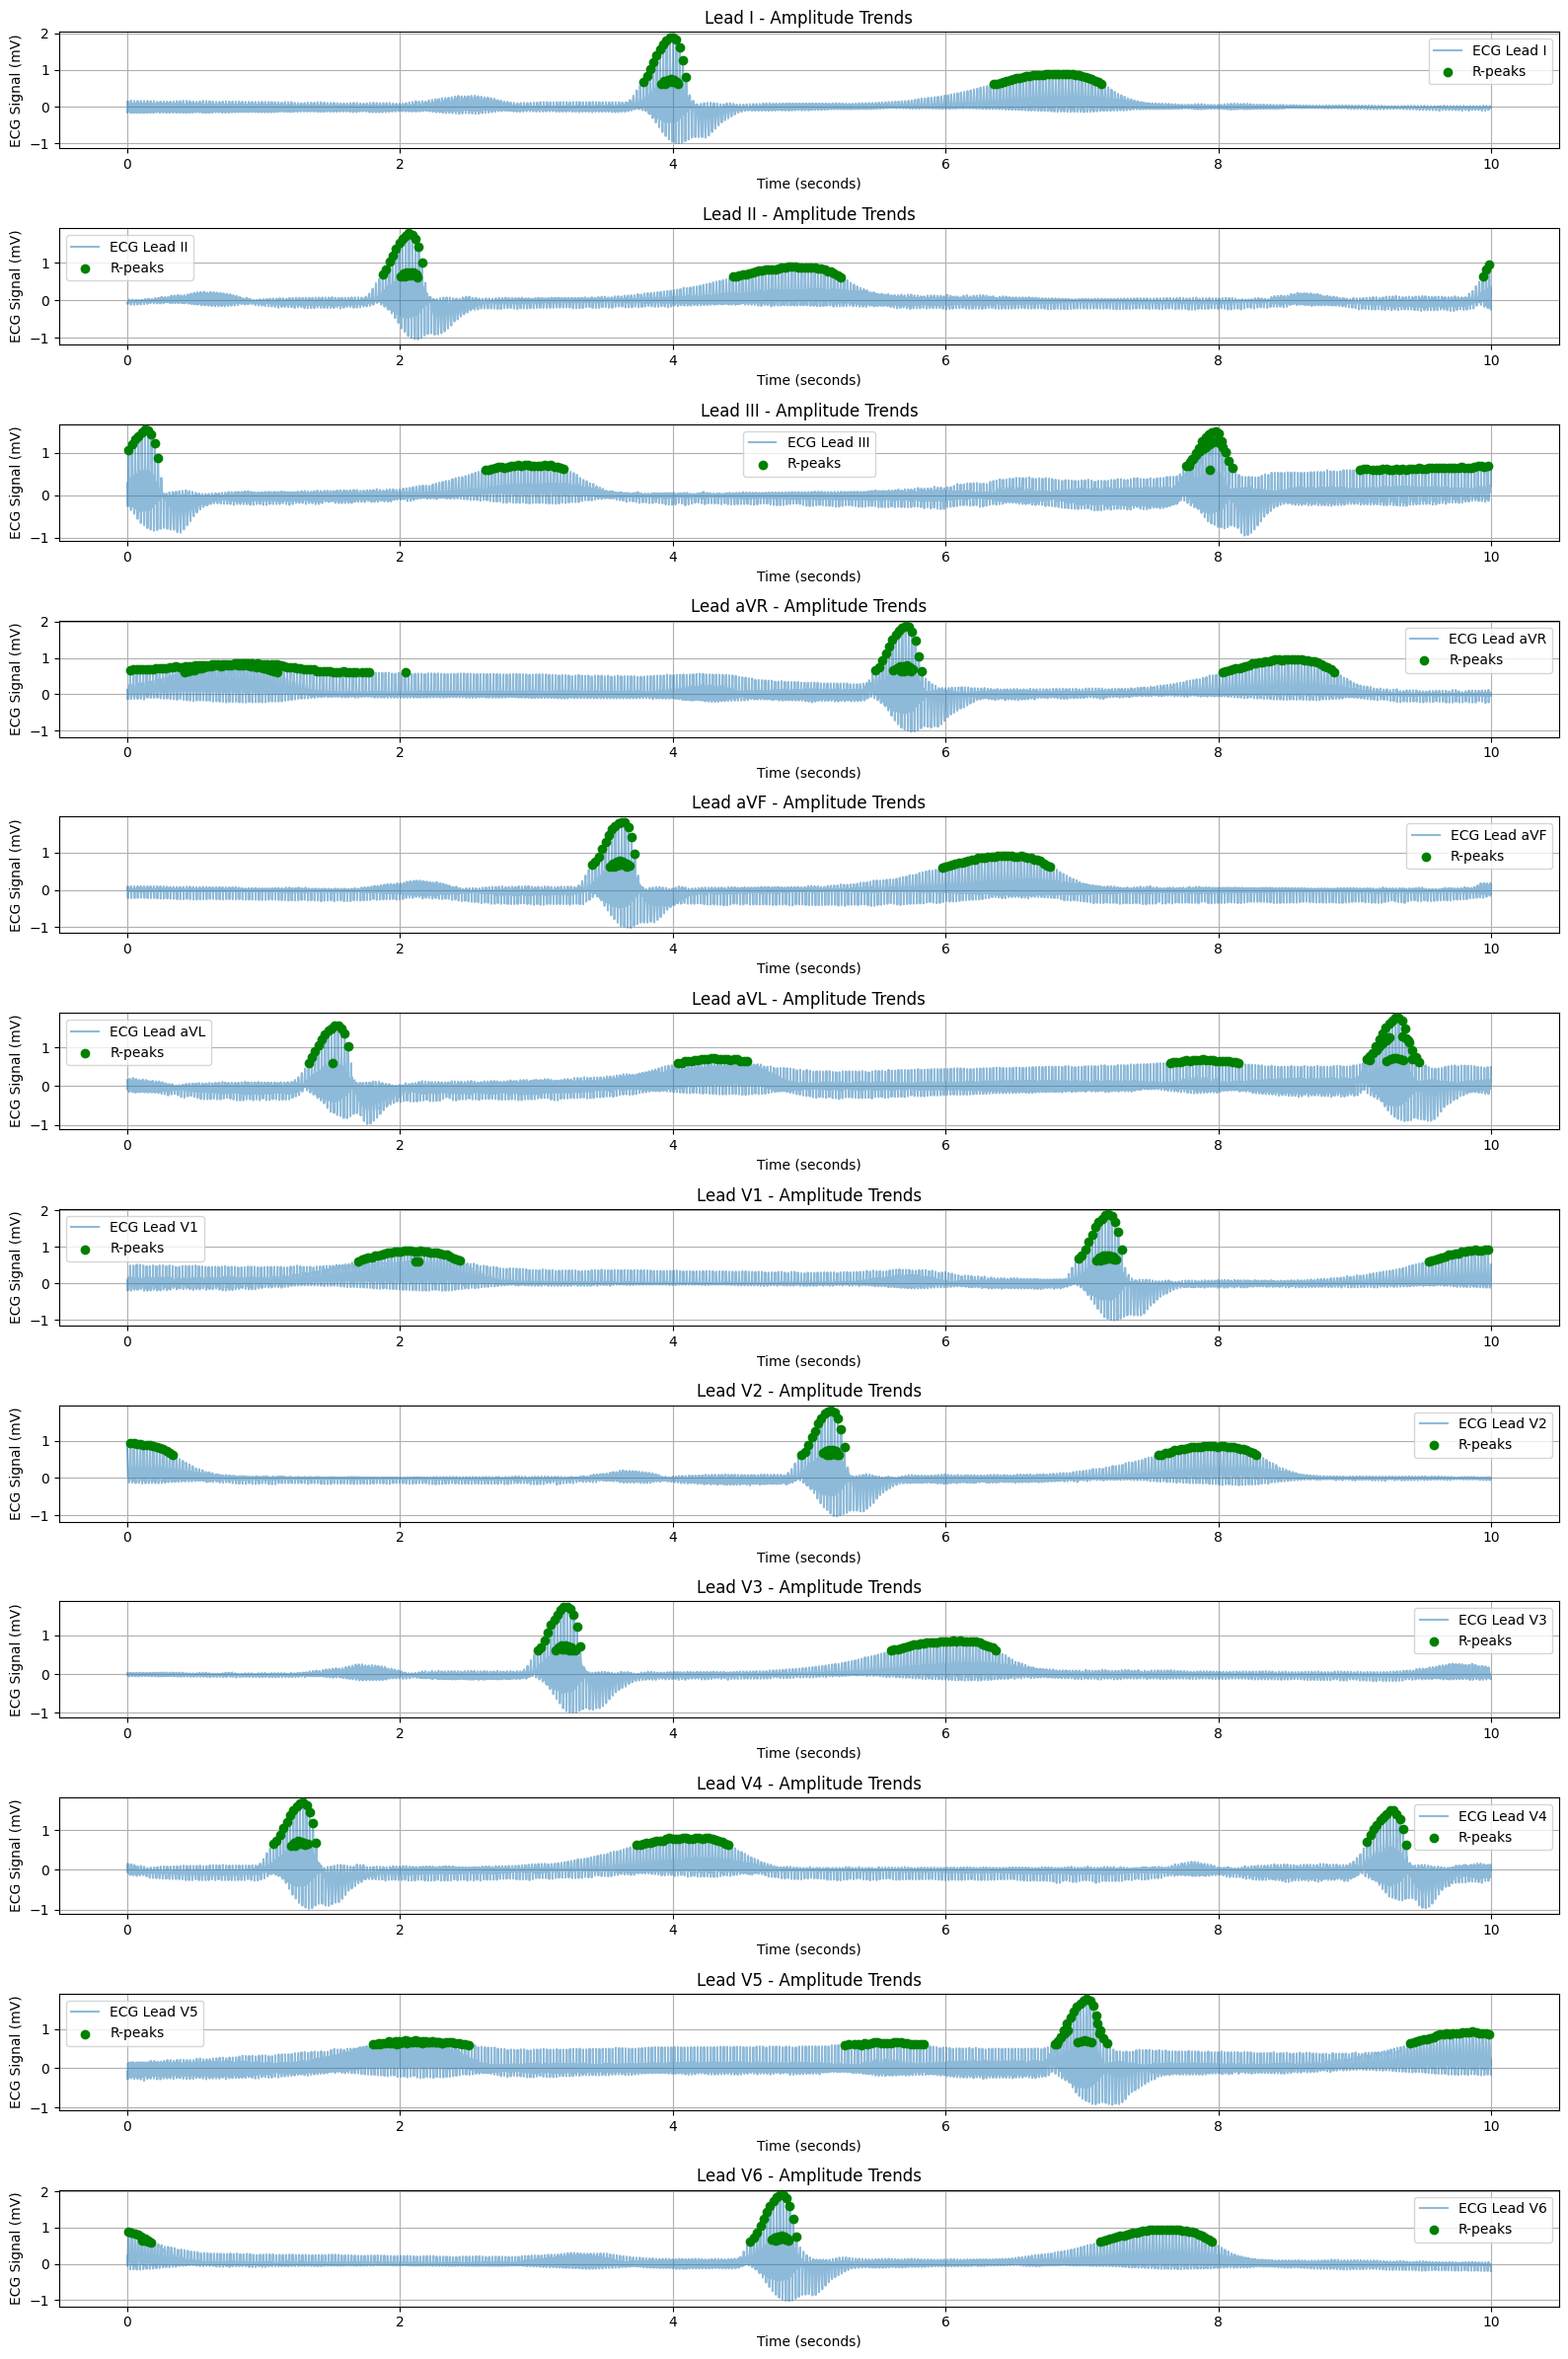

Lead I: Amplitude anomaly detected (excessive variation).
Lead II: Amplitude anomaly detected (excessive variation).
Lead III: Amplitude anomaly detected (excessive variation).
Lead aVR: Amplitude anomaly detected (excessive variation).
Lead aVF: Amplitude anomaly detected (excessive variation).
Lead aVL: Amplitude anomaly detected (excessive variation).
Lead V1: Amplitude anomaly detected (excessive variation).
Lead V2: Amplitude anomaly detected (excessive variation).
Lead V3: Amplitude anomaly detected (excessive variation).
Lead V4: Amplitude anomaly detected (excessive variation).
Lead V5: Amplitude anomaly detected (excessive variation).
Lead V6: Amplitude anomaly detected (excessive variation).


In [30]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# Load header & data file
hea_file = "../data/data_bin/40689238.hea"
dat_file = "../data/data_bin/40689238.dat"

# Read the header to extract sampling frequency and scaling factors
with open(hea_file, "r") as f:
    lines = f.readlines()

header_info = lines[0].strip().split()
channel_count = int(header_info[1]) # Number of channels
frequency     = int(header_info[2]) # Sampling frequency (Hz)
sample_count  = int(header_info[3]) # Total samples per channel

# For each channel it uses a frequency of 500 Hz
# With a sample count of 5000 samples
# The total time is 10 seconds (duration of the signal)


# Extract per-channel parameters (scale factors and channel names)
# Each subsequent line corresponds to one channel.
scale_factors = []  # list of scale factors for each lead
channel_names = []  # list of lead names

for i in range(1, channel_count + 1):
    parts = lines[i].strip().split()
    # parts[2] is a string like "200.0(0)/mV". Extract the numeric scale factor.
    scale_factor = float(parts[2].split("(")[0])
    scale_factors.append(scale_factor)

    # The last field is the lead name (e.g., I, II, III, aVR, etc.)
    channel_names.append(parts[-1])

# Read the binary .dat file as 16-bit signed integers.
data = np.fromfile(dat_file, dtype=np.int16)

# The data is stored in an interleaved format: sample0 of all channels, sample1 of all channels, etc.
# Reshape the data so that each row corresponds to one channel (lead).
data = data.reshape(channel_count, sample_count)

# Confirm that we have the expected number of samples per channel:
if data.shape[1] != sample_count:
    print("Warning: The number of samples per channel does not match the header information.")



# Convert raw data counts to millivolts (mV) using each lead's scale factor.
# For each lead, the conversion is: signal (mV) = raw_value / scale_factor.
mv_signal = []
for i in range(channel_count):
    mv_signal.append(data[i] / float(scale_factors[i]))

def calculate_amplitude(ecg_signal):
    max_amplitude = np.max(ecg_signal)
    min_amplitude = np.min(ecg_signal)
    peak_to_peak = max_amplitude - min_amplitude
    return max_amplitude, min_amplitude, peak_to_peak

# Calculate and print amplitudes for each lead
print(f"Amplitude of each lead: Sample-rate: 500 Hz, Sample-count: 5000 samples in 10 seconds")
print("-----------------------------------------------------------------------------")
for i in range(channel_count):
    max_amp, min_amp, p2p_amp = calculate_amplitude(mv_signal[i])
    print(f"Lead {channel_names[i]}: Max Amp = {max_amp:.3f} mV, Min Amp = {min_amp:.3f} mV, Peak-to-Peak Amp = {p2p_amp:.3f} mV")


# Tipically sample count is 5000 and the frequency is 500 Hz
# Create a time axis (in seconds) for the samples.
time = np.arange(sample_count) / frequency

# Define the specific time range in seconds (200ms to 400ms)
start_time_sec = 0  
end_time_sec   = 0.5 
start_idx = int(start_time_sec * frequency)
end_idx   = int(end_time_sec * frequency)

# # Plot each lead in a separate subplot.
# plt.figure(figsize=(16, 24))
# for i in range(channel_count):
#     plt.subplot(channel_count, 1, i + 1)
#     # Use this to zoom in on a specific time range
#     # plt.plot(time[start_idx:end_idx], mv_signal[i][start_idx:end_idx], color="b", label=f"Lead {channel_names[i]}")
#     plt.plot(time, mv_signal[i], color="b", label=f"Lead {channel_names[i]}")
    
#     plt.xlabel("Time (seconds)")
#     plt.ylabel("ECG Signal (mV)")
#     plt.title(f"ECG Lead {channel_names[i]}")
#     plt.grid(True)
#     plt.legend()

# plt.tight_layout()
# plt.show()

# Function to calculate the amplitude trend
def calculate_amplitude_trend(signal, window_size=100):
    """Calculate the running peak-to-peak amplitude trend using a sliding window."""
    trend = []
    for i in range(0, len(signal) - window_size, window_size):
        window = signal[i:i + window_size]
        trend.append(np.ptp(window))  # Peak-to-peak (max - min) amplitude
    return np.array(trend)

# Detect R-peaks (QRS complex peaks) using find_peaks
def detect_r_peaks(ecg_signal, threshold=0.6):
    """Detect R-peaks in the QRS complex using a threshold."""
    peaks, _ = find_peaks(ecg_signal, height=threshold)
    return peaks

# Generate the amplitude trends for each lead
window_size = 100  # Sliding window for calculating amplitude
amplitude_trends = []
for i in range(channel_count):
    trend = calculate_amplitude_trend(mv_signal[i], window_size)
    amplitude_trends.append(trend)

# Plot amplitude trends for each lead
plt.figure(figsize=(16, 24))
for i in range(channel_count):
    plt.subplot(channel_count, 1, i + 1)
    
    # Plot the original signal and amplitude trend
    plt.plot(time, mv_signal[i], label=f"ECG Lead {channel_names[i]}", alpha=0.5)
    # plt.plot(time[window_size//2: -window_size//2], amplitude_trends[i], label="Amplitude Trend", color='r', lw=2)
    
    # Highlight the R-peaks in the signal
    r_peaks = detect_r_peaks(mv_signal[i])
    plt.scatter(time[r_peaks], mv_signal[i][r_peaks], color='g', label='R-peaks', zorder=5)

    plt.xlabel("Time (seconds)")
    plt.ylabel("ECG Signal (mV)")
    plt.title(f"Lead {channel_names[i]} - Amplitude Trends")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Additional analysis: Check for anomalies in amplitude variations
# For instance, detecting excessively high peak-to-peak amplitudes, or significant changes across beats
def analyze_amplitude_anomalies(amplitude_trends, threshold_factor=2.0):
    """Analyze if amplitude trends show abnormal variations."""
    for i, trend in enumerate(amplitude_trends):
        avg_amplitude = np.mean(trend)
        max_amplitude = np.max(trend)
        min_amplitude = np.min(trend)

        if (max_amplitude - min_amplitude) > threshold_factor * avg_amplitude:
            print(f"Lead {channel_names[i]}: Amplitude anomaly detected (excessive variation).")

# Run anomaly detection
analyze_amplitude_anomalies(amplitude_trends)
